# **Class Imbalanced**

## **Introduction**

**What is Class Imbalanced ?**

> Imbalanced datasets are a common problem in machine learning, where the number of observations in one class is significantly lower than the others

* <mark style = 'background-color : powderblue'> **Class imbalance often appear in machine learing that refers to a scenario in classification problems where the distribution of classes is not uniform** </mark>
*  Imbalanced datasets are those where there is a severe skew in the class distribution, For example, in a dataset for fraud detection, there might be only 1% fraudulent transactions and 99% non-fraudulent transactions
* Imbalanced datasets apply to many types of models, including binary classification, multiclass classification, multilabel classification, and regression

**Why Imbalanced Class is Problem**

1. Bias Towards Majority Class: Algorithms tend to be biased towards the majority class due to its overwhelming presence in the training data.

2. Inaccurate Metrics: Metrics like accuracy can be misleading in imbalanced scenarios. For example, a model could be 99% accurate by predicting only the majority class, but this would ignore the minority class entirely.

3. Underrepresentation of Minority Class: The minority class, which may represent critical outcomes, is underrepresented, leading to poor model performance in predicting those classes.


> The rule of thumb facing imbalanced data : 
* never mess up with your test set. Always split into test and train sets <mark style = 'background-color:powderblue'>**before**</mark> trying oversampling/undersampling techniques!
* <mark style = 'background-color:powderblue'>**accuracy metrics**</mark> never helps in imbalanced dataset.





## **Imbalanced Dataset Handling Techniques**

Below are various techniques commonly used to handling imbalanced dataset (in this notebook we only deep dive into some techniques)

1. Resampling Techniques

    a. Oversampling

    b. Undersampling

    c. SMOTE (Synthetic Minority Over-Sampling Technique)

    d. Tomek Links
    
    e. Edited Nearest Neighbors (ENN)
    
2. Algorithmic Approaches

    a. Class Weight Adjustment
    
    b. Cost-Sensitive Learning

3. Ensemble Methods

    a. Balanced Random Forest
    
    b. EasyEnsemble and BalanceCascade

4. Anomaly Detection

    a. One-Class SVM

    b. Isolation Forest

5. Hybrid Methods

    a. Combination of Over and Under Sampling (such : SMOTE + Tomek Links)

6. Changing Evaluation Metrics

    * Instead Counting on Accuracy, Use these metrics that better suited for imbalanced dataset :

        1. Precision, Recall and F1-Score

        2. ROC-AUC, Precision-Recall Curve
    
    * *changing evaluation metrics is not directly fix the imbalance dataset, but improve  how the model is evaluated.*

## **Metrics for Imbalanced**

<p>
    <center>
        <img src = 'https://raw.githubusercontent.com/adisetiawannn/datascience_python/main/images/evaluation_metrics.png' align='center' width ='800' length ='600' alt = 'pict1'> <br>
        Credit : Marcin Rutecki - https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset#1.-Introduction
    </center>
</p>

**Why we need consider evaluation metric while facing imbalanced dataset**

<mark style = 'background-color : powderblue'>**1. Accuracy Can Be Misleading** : </mark>
* In a dataset with 95% instances of the majority class and 5% of the minority class, a model that always predicts the majority class will achieve 95% accuracy, despite never identifying any minority class samples correctly. This gives a false sense of performance

<mark style = 'background-color : powderblue'>**2. Focus on Minority Class:**</mark>
* In many imbalanced scenarios, the minority class is more critical to predict accurately (e.g., fraud detection, disease diagnosis, defect detection in manufacturing). Evaluating the performance for this class requires specific metrics.

<mark style = 'background-color : powderblue'> **3. Different Types of Errors Matter:**</mark>
* Imbalanced datasets can lead to different types of errors, such as many false negatives for the minority class. Metrics like precision, recall, and F1-score help to identify how well the model is doing with respect to correctly identifying minority class instances.

**Common metrics used for imbalanced data**

<mark style = 'background-color : powderblue'>**The most common metrics to use for imbalanced datasets are**:</mark>

1. F1 score
2. Precision
3. Recall
4. AUC score (AUC ROC)
5. Average precision score (AP)
6. G-Mean

<mark style = 'background-color : powderblue'>**Choosing metric for imbalanced data**</mark>

<p align="center">
    <img src= "https://raw.githubusercontent.com/adisetiawannn/datascience_python/main/images/metric_imbalanced.png" alt="pict2" ></br>
    Credit : Marcin Rutecki - https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset#1.-Introduction
</p>

## **Dataset**

in this notebook, we will you fraud detection dataset. you can access the dataset through this link : [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?select=creditcard.csv)

* This is the Dictionary of Features of dataset :

    * Time : Number of seconds elapsed between this transaction and the first transaction in the dataset

    * V1 : may be result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)

    * amount : Transaction amount

    * Class : 1 for fraudulent transactions, 0 otherwise

in this notebook, we don't do any data pre-processing method such as : handling missing value hand, outliers, do data feature transformation etc.

Now, let's talk about some technique that can be used to handle imbalanced data. first, check target proportion.

## **Check Imbalanced Class**

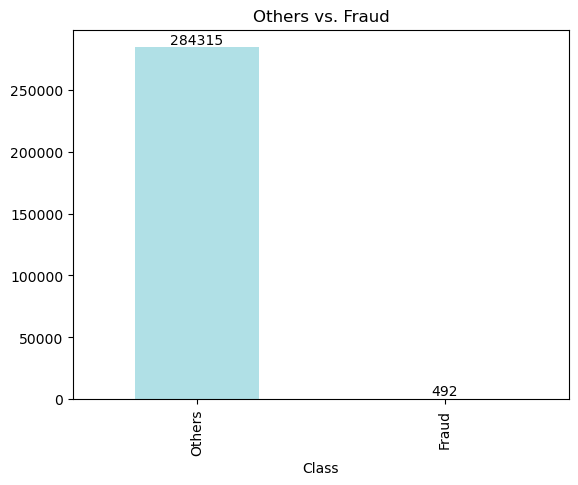

Proportion of each class:
Class
0    99.83%
1     0.17%
Name: count, dtype: object


In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

dataset = pd.read_csv('/Users/Shared/Cloud Drive/repo_adi/dataset/creditcard.csv')
dataset.head().style.background_gradient(cmap='Blues')

# check data proportion on Class Feature
class_counts = dataset['Class'].value_counts()
class_counts.plot(kind='bar',color=['powderblue','darkblue'], title='Others vs. Fraud')
plt.xticks(ticks=dataset['Class'].unique(),labels=['Others','Fraud'])

# adding label counts
for i, count in enumerate(class_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

print("====="*30)

percentage_class = class_counts/sum(class_counts)
print(f'Proportion of each class:\n{percentage_class.map(lambda x: "{:.2%}".format(x))}')


notice, target is highly imbalanced. as a fraud transaction is majority and others is minority. let's make a train and test data then build a logistic regression model in order to evaluate effectiveness of imbalanced data handling techniques.


## **Baseline Model - Class Imbalanced Evaluation**

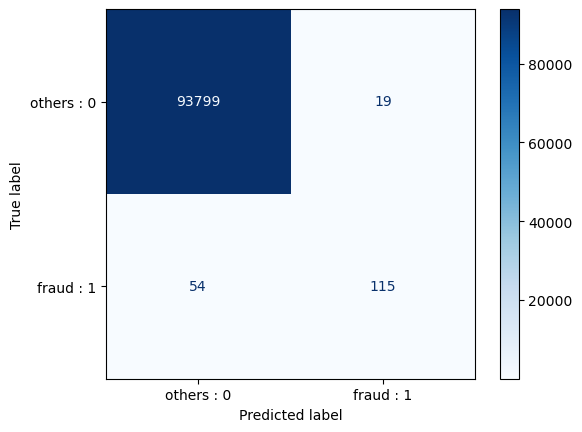

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93818
           1       0.86      0.68      0.76       169

    accuracy                           1.00     93987
   macro avg       0.93      0.84      0.88     93987
weighted avg       1.00      1.00      1.00     93987



In [283]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay,auc, f1_score,accuracy_score, precision_score, recall_score
import numpy as np

# Define target and features
raw_target = dataset['Class'].copy()  # Target column (Class)
raw_features = dataset.drop(columns=['Class'],axis=1)  # Feature columns

# build logistic regression model
model = LogisticRegression(random_state=42)
X_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(raw_features, raw_target, test_size=0.33)

# fit raw_dataset to the model
model_fit = model.fit(X_raw_train, y_raw_train)
y_raw_pred = model_fit.predict(X_raw_test)

# display confusion matrix
raw_cm = confusion_matrix(y_true=y_raw_test, y_pred=y_raw_pred)

raw_disp_cm = ConfusionMatrixDisplay(raw_cm, display_labels=np.where(model.classes_ == 0, 'others : 0', 'fraud : 1'))
raw_disp_cm.plot(cmap='Blues')
plt.show()

# print classification report
print(classification_report(y_raw_test, y_raw_pred))

**Note :** The overall accuracy is 1.00, which can be misleading due to class imbalance. Since the dataset is heavily skewed towards the majority class (0), a high accuracy might not reflect the actual performance for the minority class (1).

## **Imbalanced Data Technique**

## 1. Resampling

In general, there are 2 common approaches to random resampling for imbalanced dataset : **Downsampling (Undersampling) and Oversampling**.

Resampling is the most straightforward way to handle imbalanced data, which involves removing samples from the majority class (undersampling) and/or adding more examples from the minority class (oversampling).

Resampling involves creating a new transformed version of the training dataset in which the selected examples have a different class distribution.

> Important Note : Always split into test and train sets BEFORE trying any resampling techniques! **Resampling** before splitting the data can allow the exact same observations to be present in both the test and train sets! This can allow our model to simply memorize specific data points and cause overfitting.

### 1.1 Proper Workflow for Handling Imbalanced Datasets with Resampling Techniques:

a. Splitting Data: Begin by using train_test_split to divide the dataset into training and testing sets.

b. Oversampling/Undersampling on Training Set: Once the data is split, **perform oversampling or undersampling only on the training set**. The test set should remain untouched to ensure realistic evaluation results.

c. Training and Evaluation: Train the model on the resampled training data and evaluate its performance on the untouched test set.

### 1.2 Downsampling or Undersampling Method

<mark style = "background-color : powderblue">**With downsampling, we decrease the number of examples from the majority class used during model training.**</mark>

Downsampling is a solution for handling imbalanced datasets by changing the underlying dataset, rather than the model.

you can do downsampling with imbalanced library packages : <mark style = 'background-color : powderblue'>**imblearn.under_sampling**</mark>


**How undersampling works**
* In an imbalanced dataset, the majority class has significantly more samples than the minority class. <mark style = 'background-color : powderblue'>**Downsampling involves randomly removing or discarding some of the majority class samples until the size of the majority class is reduced to match or come closer to the size of the minority class**.</mark>
<p align="center">
    <img src= "https://raw.githubusercontent.com/adisetiawannn/datascience_python/main/images/undersampling.png" alt="pict3" >
</p>

#### 1.2.1 Apply Downsampling method on train dataset

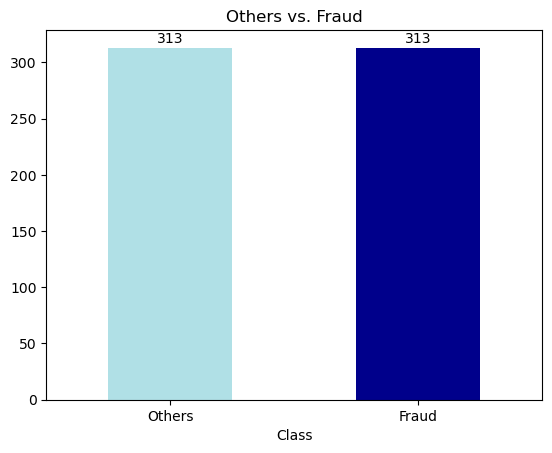

Class
0    0.5
1    0.5
Name: proportion, dtype: float64

In [167]:
# import packages for visualization
import matplotlib.pyplot as plt

# import downsampling library
from imblearn.under_sampling import RandomUnderSampler

# make downsampling model
downsampling = RandomUnderSampler(sampling_strategy='majority')

# fit downsampling model
down_X_train,down_y_train = downsampling.fit_resample(X=X_raw_train, y=y_raw_train)

# Plot the distribution of undersampling of target data train
under_y_train_count = down_y_train.value_counts()

# Bar plot
under_y_train_count.plot(kind='bar', color=['powderblue', 'darkblue'], title='Others vs. Fraud')
plt.xticks(ticks=[0, 1], labels=['Others', 'Fraud'], rotation=0)

# Add label counts on top of the bars
for i, count in enumerate(under_y_train_count):
    plt.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

print("====="*20)

# Display the class distribution in percentage
down_y_train.value_counts(normalize=True)

#### 1.2.2 Fit Downsampling train data into Baseline Model

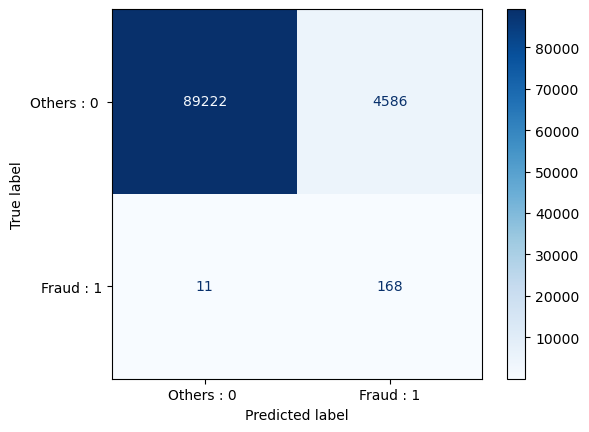

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     93808
           1       0.04      0.94      0.07       179

    accuracy                           0.95     93987
   macro avg       0.52      0.94      0.52     93987
weighted avg       1.00      0.95      0.97     93987



In [168]:
# isolate target and feature undersampling dataset
down_X_train,down_y_train = down_X_train,down_y_train

# fit downsampling dataset to the model
downsampling_model_fit = model.fit(down_X_train, down_y_train)
downsampling_y_pred = downsampling_model_fit.predict(X_raw_test)
down_y_train = down_y_train.to_numpy()
downsampling_cm = confusion_matrix(y_true=y_raw_test, y_pred=downsampling_y_pred)
disp_downsampling_cm = ConfusionMatrixDisplay(downsampling_cm, display_labels=np.where(model.classes_ == 0, 'Others : 0 ', 'Fraud : 1'))
disp_downsampling_cm.plot(cmap='Blues')
plt.show()

# print classification report
print(classification_report(y_raw_test, downsampling_y_pred))


### 1.3 Oversampling Method

#### 1.3.1 Apply Oversampling on Dataset

**What is Random Oversampling Method**

<mark style = "background-color : powderblue">**With Oversampling, we increase the number of examples from the minority class used during model training.**</mark>


you randomly duplicate instances from the minority class to increase its representation in the dataset. This helps balance the class distribution, ensuring that the machine learning model gets more examples of the minority class, which can lead to better predictions for that class. We can use oversampler method from imblearn packages.

**When to Use Random Oversampling Method**

1. Use it when you have a highly imbalanced dataset and you want to improve the model’s ability to predict the minority class.
2. It works well in cases where the cost of missing the minority class (such as fraud detection, medical diagnosis) is high.

**Advantage of Using Random Oversampling Method**

1. Improves Model Performance for the Minority Class: By increasing the representation of the minority class, the model can better recognize patterns in that class, leading to better recall and F1-scores.
2. Simple to Implement: It’s easy to implement and works well in situations where the minority class is underrepresented but critical to predict.
3. Works with Small Datasets: Random oversampling can be effective when the dataset is small and you want to balance the classes without gathering new data.
4. Avoids Data Loss: Unlike undersampling (which reduces the majority class), random oversampling doesn’t discard any data

**Disadvantages of Random Oversampling**

1. Overfitting: The primary risk is overfitting. By replicating the same minority class examples multiple times, the model might become too specialized to those examples, learning specific patterns that don't generalize well to new, unseen data. The model might also become biased toward the repeated minority samples.
2. Increased Computational Cost: Since the dataset size increases with oversampling, this can increase the time needed for training and the computational cost, especially for large datasets.
3. No New Information: Random oversampling doesn't add any new information to the dataset. It merely duplicates existing data, which doesn't help in learning new patterns or generating better insights.
4. Risk of Model Bias: The model might treat oversampled (duplicated) minority class samples as more important than they are, creating potential bias.

**How Oversampler Work**

<p>
    <center>
        <img src = "https://raw.githubusercontent.com/adisetiawannn/datascience_python/main/images/oversampling.png" alt="pict4"  ></img>
    </center>
</p>



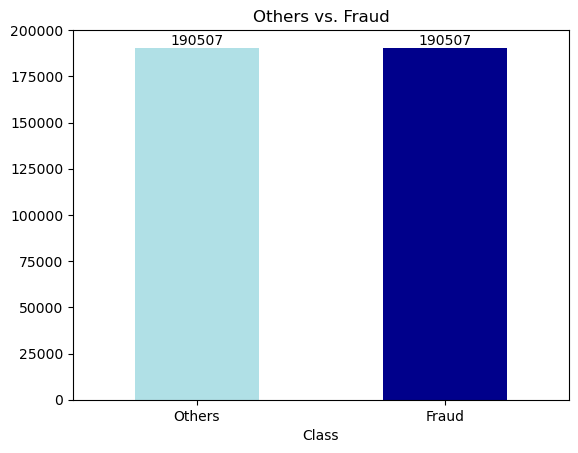

Class
0    0.5
1    0.5
Name: proportion, dtype: float64

In [169]:
# import packages : oversampler
from imblearn.over_sampling import RandomOverSampler

# make oversampling model
oversampling = RandomOverSampler(sampling_strategy='minority')

# fit oversampling model
over_X_train, over_y_train = oversampling.fit_resample(X=X_raw_train, y=y_raw_train)

# Plot the distribution of oversampling of target data train
over_y_train_count = over_y_train.value_counts()

# Bar plot
over_y_train_count.plot(kind='bar', color=['powderblue', 'darkblue'], title='Others vs. Fraud')
plt.xticks(ticks=[0, 1], labels=['Others', 'Fraud'], rotation=0)

# Add label counts on top of the bars
for i,count in enumerate(over_y_train_count):
    plt.text(i, count+2,str(count),ha='center',va='bottom',fontsize=10)

plt.show()


print("====="*20)

# Display the class distribution in percentage
over_y_train.value_counts(normalize=True)

#### 1.3.2 Fit Oversampling Dataset into Baseline Model

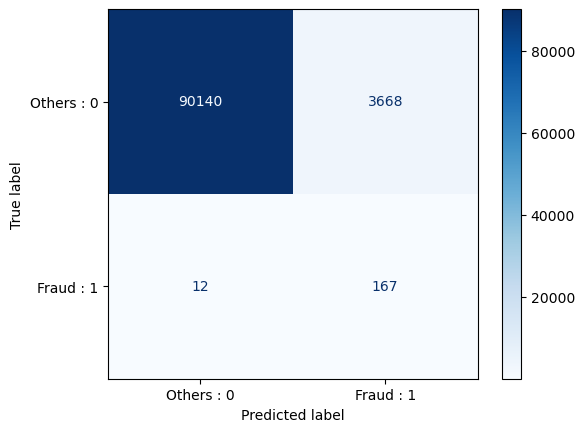

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     93808
           1       0.04      0.93      0.08       179

    accuracy                           0.96     93987
   macro avg       0.52      0.95      0.53     93987
weighted avg       1.00      0.96      0.98     93987



In [268]:
# isolate target and feature oversampling dataset
over_X_train,over_y_train = over_X_train, over_y_train

# fit oversampling dataset to the model
oversampling_model_fit = model.fit(over_X_train, over_y_train)
oversampling_y_pred = oversampling_model_fit.predict(X_raw_test)

# evaluate the model
over_cm = confusion_matrix(y_true=y_raw_test, y_pred=oversampling_y_pred)
disp_over_cm = ConfusionMatrixDisplay(over_cm, display_labels=np.where(model.classes_ == 0, 'Others : 0', 'Fraud : 1'))
disp_over_cm.plot(cmap='Blues', values_format='.10g')
plt.show()

# print classification report
print(classification_report(y_raw_test, oversampling_y_pred))

### **1.4 SMOTE (Synthetic Minority Over-Sampling Technique)**

**What is SMOTE Technique** 

Synthetic Minority Over-sampling Technique (SMOTE) is a technique that generates new observations by **interpolating between observations in the original dataset.**

SMOTE is one of popular technique for handling imbalanced dataset.

**How SMOTE Works**

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.


At a high level, the SMOTE algorithm can be described as follows:

1. Take difference between a sample and its nearest neighbour
2. Multiply the difference by a random number between 0 and 1
3. Add this difference to the sample to generate a new synthetic example in feature space
4. Continue on with next nearest neighbour up to user-defined number

<p>
    <center>
        <img src = "https://raw.githubusercontent.com/adisetiawannn/datascience_python/main/images/smote.png" alt="pict4"  ></img><br>
        <p align="center">
    <img src= "https://raw.githubusercontent.com/adisetiawannn/datascience_python/main/images/smote_2.png" alt="pict2" ></br>
    Credit : Niranjan Appaji - https://medium.com/@niranjan.appaji/balancing-act-mastering-imbalanced-data-with-smote-and-tomek-link-strategies-289f39597122
</p>
    </center>
</p>

> To implement SMOTE technique, we can use imblearn.over_sampling.SMOTE

**Advantages and Disadvantages of Using SMOTE Technique**

**Advantages**

1. Improves Minority Class Representation
2. Reduces Overfitting : risk of overfitting reduced when model memorizes repeated samples.
3. Works Well With Various Algorithms
4. Improves Performances of Evaluation Metrics
5. Maintains Original Data Distribution
6. Flexible and Easy to Implement

**Disadvantages**

1. Risk of Over Generalization : Due to SMOTE inject synthetic data that do not reflect the real data
2. Increased Computational Cost
3. Not Effective with All Datasets
4. Potential Class Overlap

#### 1.4.1 Apply SMOTE to Dataset

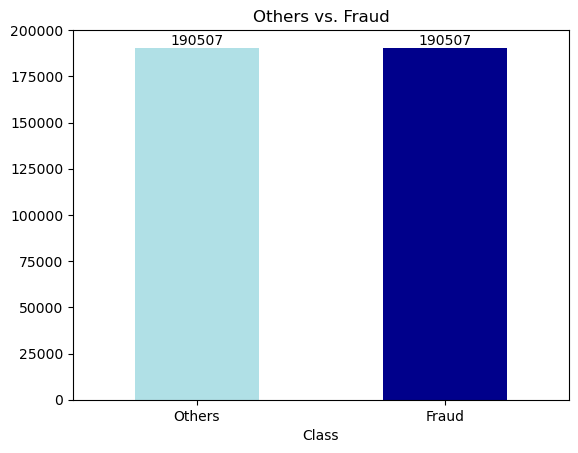

Class
0    0.5
1    0.5
Name: proportion, dtype: float64

In [274]:
# SMOTE USING IMBLEARN LIBRARY

from imblearn.over_sampling import SMOTE

# build smote model
smote = SMOTE(sampling_strategy='minority', random_state=42, k_neighbors = 5)

# fit train dataset into smote model
smote_X_train, smote_y_train = smote.fit_resample(X=X_raw_train, y=y_raw_train)
smote_x_train, smote_y_train = smote.fit_resample (X_raw_train,y_raw_train)

# Plot the proportion of smote on target data train
smote_y_train_count = smote_y_train.value_counts()

# Bar plot
smote_y_train_count.plot(kind='bar', color=['powderblue', 'darkblue'], title='Others vs. Fraud')
plt.xticks(ticks=[0, 1], labels=['Others', 'Fraud'], rotation=0)

# Add label counts on top of the bars
for i, count in enumerate(smote_y_train_count):
    plt.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

print("====="*20)

# Display the class distribution in percentage
smote_y_train.value_counts(normalize=True)

#### 1.4.2 Fit SMOTE Dataset into Baseline Model


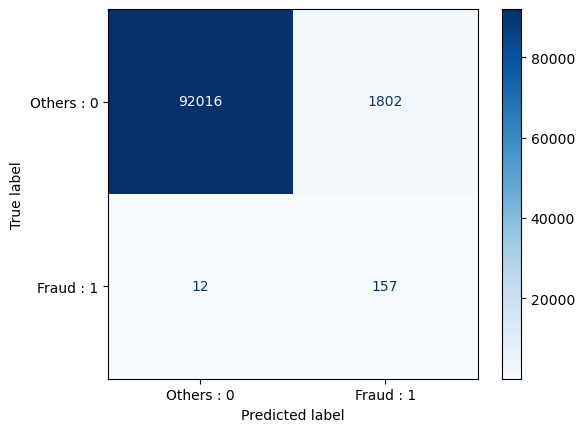

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     93818
           1       0.08      0.93      0.15       169

    accuracy                           0.98     93987
   macro avg       0.54      0.95      0.57     93987
weighted avg       1.00      0.98      0.99     93987



In [287]:
# isolate target and feature SMOTE dataset
smote_X_train,smote_y_train = smote_X_train, smote_y_train
# fit SMOTE dataset to the model
smote_model_fit = model.fit(smote_X_train, smote_y_train)
smote_y_pred = smote_model_fit.predict(X_raw_test)

# evaluate the model
smote_cm = confusion_matrix(y_true=y_raw_test, y_pred=smote_y_pred)
disp_smote_cm = ConfusionMatrixDisplay(smote_cm, display_labels=np.where(model.classes_ == 0, 'Others : 0', 'Fraud : 1'))
disp_smote_cm.plot(cmap='Blues', values_format='.10g')
plt.show()

# print classification report
print(classification_report(y_raw_test, smote_y_pred))

### 1.5 Tomek Links 

**What is Tomek Links**

Tomek Links is an undersampling technique used to handle imbalanced datasets by identifying and removing samples from the majority class that are close to samples from the minority class

It’s often used in combination with other techniques for handling imbalanced data. In summary, Tomek undersampling targets the removal of instances involved in Tomek Links to enhance the discrimination between classes, particularly focusing on the minority class near the decision boundary.

**How Tomek Links Work**

<p>
    <center>
        <img src = "https://raw.githubusercontent.com/adisetiawannn/datascience_python/main/images/tomek_links.png" alt="pict4"  ></img>
    </center>
</p>

> To use tomek links method, we can use imblearn.undersampling.NearMiss

**Advantages and Disadvantages of Tomek Links Method**

* The advantages of using Tomek links include their simplicity, effectiveness in reducing noise and improving classification accuracy, and the ability to identify important instances from the minority class.

* A disadvantage of using Tomek links is that removing too many instances from the majority class can lead to underfitting and a decrease in overall classification performance.

#### 1.5.1 Apply Tomek Links Method to Dataset

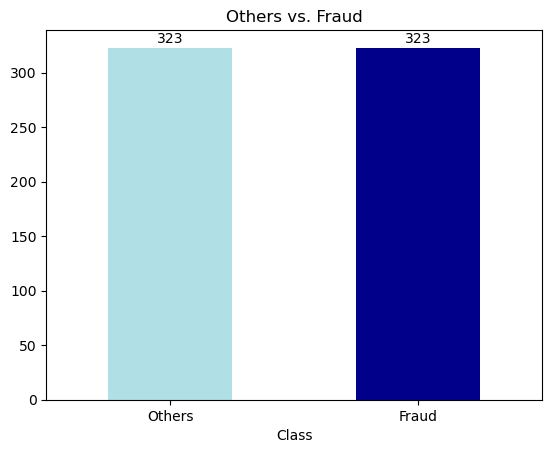

Class
0    0.5
1    0.5
Name: proportion, dtype: float64

In [285]:
# Apply Tomek Links to Train Dataset

from imblearn.under_sampling import NearMiss

# build tomek links model
tomek = NearMiss(sampling_strategy='majority', n_neighbors=3)

# fit train dataset into smote model
tomek_x_train, tomek_y_train = tomek.fit_resample(X_raw_train,y_raw_train)

# Plot the proportion of smote on target data train
tomek_y_train_count = tomek_y_train.value_counts()

# Bar plot
tomek_y_train_count.plot(kind='bar', color=['powderblue', 'darkblue'], title='Others vs. Fraud')
plt.xticks(ticks=[0, 1], labels=['Others', 'Fraud'], rotation=0)

# Add label counts on top of the bars
for i, count in enumerate(tomek_y_train_count):
    plt.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

print("====="*20)

# Display the class distribution in percentage
tomek_y_train.value_counts(normalize=True)

#### 1.5.2 Fit Tomek Links Dataset into Baseline Model

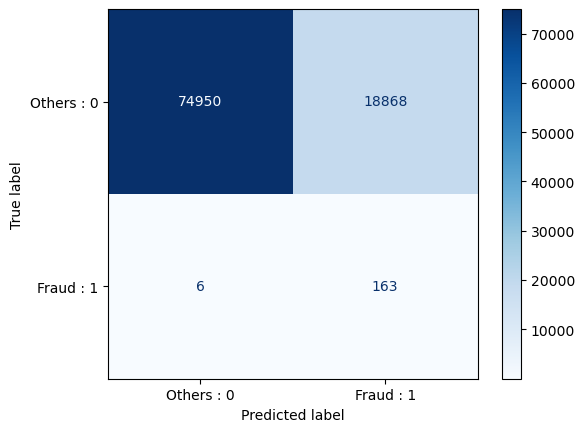

              precision    recall  f1-score   support

           0       1.00      0.80      0.89     93818
           1       0.01      0.96      0.02       169

    accuracy                           0.80     93987
   macro avg       0.50      0.88      0.45     93987
weighted avg       1.00      0.80      0.89     93987



In [288]:
# isolate target and feature tomek links dataset
tomek_x_train,tomek_y_train = tomek_x_train, tomek_y_train

# fit tomek links dataset to the model
tomek_model_fit = model.fit(tomek_x_train, tomek_y_train)
tomek_y_pred = tomek_model_fit.predict(X_raw_test)

# evaluate the model
tomek_cm = confusion_matrix(y_true=y_raw_test, y_pred=tomek_y_pred)
disp_tomek_cm = ConfusionMatrixDisplay(tomek_cm, display_labels=np.where(tomek_model_fit.classes_ == 0, 'Others : 0', 'Fraud : 1'))
disp_tomek_cm.plot(cmap='Blues', values_format='.10g')
plt.show()

# print classification report
print(classification_report(y_raw_test, tomek_y_pred))

### **1.4 Conclusion of Using Resampling Method on Handling Imbalanced Dataset**

**Advantages and Disadvantages of Resampling Methods:**

**Advantages:**
1. Improves Class Balance: By balancing the number of instances for each class, resampling methods allow machine learning algorithms to focus on minority classes that would otherwise be overlooked.
2. Simple and Easy to Implement: Methods like random oversampling and undersampling are straightforward to apply using libraries like imblearn.
3. Improves Recall for Minority Class: Especially with oversampling, the model gets more exposure to minority class samples, which can improve recall for rare events.

**Disadvantages:**
1. Overfitting (with Oversampling): Oversampling, particularly with random oversampling, may lead to overfitting since it duplicates instances of the minority class. This causes the model to "memorize" the training examples.
2. Loss of Information (with Undersampling): Undersampling reduces the dataset size by removing samples from the majority class, which can result in loss of valuable information.
3. Computational Cost: Oversampling methods increase the size of the dataset, which may lead to longer training times and higher memory consumption.
Bias (with Undersampling): Since undersampling removes data points, it may introduce bias by omitting important instances from the majority class, affecting the model's generalization.

**Below are comparison of Advantages and Disadvantages Using Downsampling dan Oversampling on Handling Imbalanced Dataset**

| **Method**      | **Advantages**                                                                 | **Disadvantages**                                                              |
|-----------------|--------------------------------------------------------------------------------|--------------------------------------------------------------------------------|
| **Oversampling** | - Improves recall for the minority class                                       | - High risk of overfitting, especially with random oversampling                |
|                 | - Easy to implement with libraries like `imblearn`                             | - Increases dataset size, leading to higher computational costs                |
|                 | - Allows the model to learn better from the minority class                     | - May not handle minority class variance effectively (duplicate samples)       |
| **Undersampling**| - Reduces training time due to smaller dataset size                           | - Loss of important information from majority class                            |
|                 | - Simple and fast to implement                                                 | - Can introduce bias by eliminating too many instances from the majority class |
|                 | - Can be combined with other techniques for improved performance               | - May result in an under-represented majority class                            |


## 2. **Cost Sensitive Learning - Weighted Balanced**

> the goal of cost-sensitive learning is to penalize the model more for misclassifying the minority class than the majority class

**What is Weighted Balanced**

The concept of class weights involves assigning a higher penalty or higher importance to misclassifications of the minority class.

a machine learning model tends to favor the majority class because it appears more frequently. This bias can lead to poor performance in predicting the minority class

when using weight class, we assign higher weights to the minority class and lower to the majority class.

with this method, we can increase recall, f1 and precision score for minority class.

**Algorithm that support Weight Class**

1. Logistic Regression
2. SVM (Support Vector Machine)
3. Decision Tree
4. Random Forest

**How Class Weights Work:**

In practice, many algorithms like Logistic Regression, Random Forest, SVM, and others allow for setting class_weight='balanced' or manually specifying weights.

* class_weight='balanced' -> also called **inversely proportional**: Automatically adjusts the class weights inversely proportional to the class frequencies.

    * if we set, class_weight='balanced', it's equal to use the inverse of class frequency. the formula is :

        * class weight = $\frac{n_{total samples}}{n_{classes} \times n_{class samples}}$

        Where :
        * $n_{totalsamples}$ : total number of samples in the dataset.
        * $n_{classes}$ : total number of classes.
        * $n_{class samples}$ : number of samples in a particular class.

        Example : suppose we have dataset with 1000 rows, then the proportion is 90% majority class (label = 0) and 10% minority class (label=1), the weight each class is :

        * class weight of majority class = $\frac{1000}{2 \times 900} =0.556$

        * class weight of minority class = $\frac{1000}{2 \times 100} =5.0$


* Manually assigning weights: Allows you to set specific penalties for misclassification of each class.

**Optimalize Class Weight With GridCV (Cross Validation)**

if you want to know the best weight class for your model, you should do cross validation. the common way, you can use GridCV to get best weight for the model.

Step-by-Step Implementation of GridSearchCV for Optimal Class Weights : 

1. Import Relevant Packages (Mainly : sklearn.model_selction.GridSearchCV)
2. Split Dataset as Train and Test Dataset
3. define grid of weight class : These weights will be passed into GridSearchCV to identify the best weight combination.
4. Initialize the model with class_weight
5. Use GridSearchCV : Pass the model, parameter grid, and scoring metric into GridSearchCV
6. Get the best class weights: After fitting, the best class weights can be accessed using best_params_
7. Evaluate the model: Using the optimal class weights, make predictions on the test data and evaluate the model’s performance
8. Adjust based on results: Depending on the performance, you can further tweak the weight ranges in the param_grid to improve the model.


#### 2.1 Calculate Inverse Proportional Class Weight - Self Function & Scikit Learn Library

In [183]:
# handling imbalanced dataset with weight class

# 1. Inverse Proportional Class Weight 

## 1.a Calculate the inversly propotional class weight manually
def inversely_class_weight (target_var) :
    weight_dict = {}
    unique_class = target_var.unique()
    total_samples = len(target_var)
    
    for i in target_var.unique() :
        class_count = len(target_var[target_var==i])
        weight_dict[i] = total_samples / (len(unique_class) * class_count)
        
    return weight_dict

## the weight of each class on y_raw_train data
class_weight_manually = inversely_class_weight(y_raw_train)

## 1.b Calculate the inversly propotional class weight using sklearn

# import packages
from sklearn.utils import class_weight

# Calculate the inverse weight class using sklearn
class_weight_sklearn = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_raw_train), y=y_raw_train)

## Comparison
print(f'calculate weight class manually :\n 0 : {class_weight_manually[0]}\n 1 : {class_weight_manually[1]}')
print('==='*15)
print(f'calculate weight class using logistic regression :\n 0 : {class_weight_sklearn[0]}\n 1 : {class_weight_sklearn[1]}')

calculate weight class manually :
 0 : 0.500821492123649
 1 : 304.8242811501597
calculate weight class using logistic regression :
 0 : 0.500821492123649
 1 : 304.8242811501597


#### 2.2 Apply Weight Class method on Model (Logistic Regression)

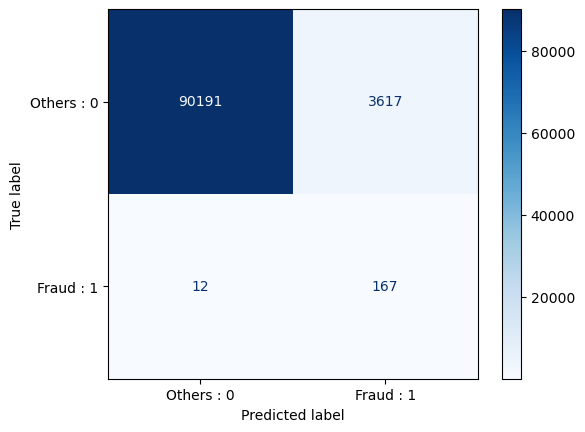

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     93808
           1       0.04      0.93      0.08       179

    accuracy                           0.96     93987
   macro avg       0.52      0.95      0.53     93987
weighted avg       1.00      0.96      0.98     93987



In [258]:
# import packages
from sklearn.linear_model import LogisticRegression

# model
clf = LogisticRegression(class_weight='balanced', random_state=42)

# fit train dataset into model
clf.fit(X_raw_train, y_raw_train)

# predict test dataset
wb_y_pred = clf.predict(X_raw_test)

# evaluate the model
wb_cm = confusion_matrix(y_true=y_raw_test, y_pred=wb_y_pred)
disp_wb_cm = ConfusionMatrixDisplay(wb_cm, display_labels=np.where(clf.classes_ == 0, 'Others : 0', 'Fraud : 1'))
disp_wb_cm.plot(cmap='Blues', values_format='.10g')
plt.show()

# print classification report
print(classification_report(y_raw_test, wb_y_pred))

#### 2.3 Apply Cross Validation Weight Class on Logistic Regression Model

Stages conducting CV Weight Class : 

1. Import Relevant Packages (Mainly : sklearn.model_selction.GridSearchCV)
2. Split Dataset as Train and Test Dataset
3. define grid of weight class : These weights will be passed into GridSearchCV to identify the best weight combination.
4. Initialize the model with class_weight
5. Use GridSearchCV : Pass the model, parameter grid, and scoring metric into GridSearchCV
6. Get the best class weights: After fitting, the best class weights can be accessed using best_params_
7. Evaluate the model: Using the optimal class weights, make predictions on the test data and evaluate the model’s performance
8. Adjust based on results: Depending on the performance, you can further tweak the weight ranges in the param_grid to improve the model.

In [246]:
# 1. Import relevant pakcages : for some library, we have already done in the previous step, but we will add gridsearchcv module.
from sklearn.model_selection import GridSearchCV

# 2. Split Dataset as Train and Test Dataset : we have already done in the previous step

# 3. Define Grid Search of Weight Class
weight_class_grid_params = [{'class_weight': [{0: x, 1: 1 - x} for x in np.linspace(0.05, 0.95, 20)]}]

# 4. Initialize Model with class_weight = we have already done in the previous step. in this case, we will use our baseline model
cv_wb_model = model

# 5. Use GridSearch CV
cv_grid = GridSearchCV(cv_wb_model, param_grid=weight_class_grid_params, cv=5, scoring='f1')
cv_grid_model = cv_grid.fit(X_raw_train, y_raw_train)

## make a function to collect combination and score of grid search
def make_cv_results(cv_grid_model):
    # Initialize empty lists to collect scores and weights
    weights_1 = []
    weights_0 = []
    scores = []
    # Iterate over the grid search results
    for idx, param in enumerate(cv_grid_model.cv_results_['params']):
        # Collect the weight for class 1 from the parameter grid
        weight_1_value = param['class_weight'][1]
        weight_0_value = param['class_weight'][0]
        score = cv_grid_model.cv_results_['mean_test_score'][idx]
        # Append the weight and score to respective lists
        weights_1.append(weight_1_value)
        weights_0.append(weight_0_value)
        scores.append(score)
    # Create a DataFrame with the collected results
    results = pd.DataFrame({'Weight Majority Class': weights_0, 'Weight Minority Class': weights_1, 'Score': scores})
    return results

,Weight Majority Class,Weight Minority Class,Score
0,0.050000,0.950000,0.457372
1,0.097368,0.902632,0.560022
2,0.144737,0.855263,0.621215
3,0.192105,0.807895,0.665588
4,0.239474,0.760526,0.675359
5,0.286842,0.713158,0.678558
6,0.334211,0.665789,0.695047
7,0.381579,0.618421,0.689689
8,0.428947,0.571053,0.682197
9,0.476316,0.523684,0.702246


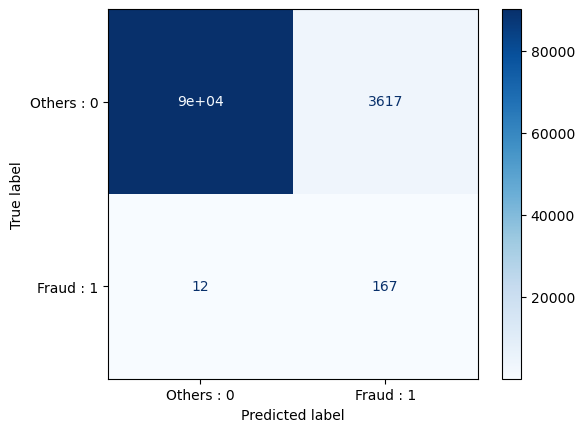

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93808
           1       0.71      0.67      0.69       179

    accuracy                           1.00     93987
   macro avg       0.85      0.83      0.84     93987
weighted avg       1.00      1.00      1.00     93987



In [254]:
# 6. Get Best params
cv_grid_model.best_params_

# 7. Evaluate the model: Using the optimal class weights, make predictions on the test data and evaluate the model’s performance
clf_best_params = LogisticRegression(**cv_grid_model.best_params_)
clf_best_params.fit(X_raw_test, y_raw_test)
best_params_y_pred = clf_best_params.predict(X_raw_test)

# evaluate the model
best_wb_cm = confusion_matrix(y_true=y_raw_test, y_pred=wb_y_pred)
disp_best_wb_cm = ConfusionMatrixDisplay(best_wb_cm, display_labels=np.where(clf.classes_ == 0, 'Others : 0', 'Fraud : 1'))
disp_best_wb_cm.plot(cmap='Blues')
plt.show()

# print classification report
print(classification_report(y_raw_test, best_params_y_pred))

# **Performance Comparison**

In [289]:
# make a function that collect metric evaluation by method

def make_results(model_name:str, y_true,y_pred):
    from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
    
    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = f1_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

# raw dataset or doesnt apply any imbalanced handling method
baseline_model = make_results(model_name='baseline',y_true=y_raw_test, y_pred=y_raw_pred)

# apply undersampling method
undersampling_method = make_results(model_name='undersampling_method',y_true=y_raw_test, y_pred=downsampling_y_pred)

# apply oversampling method
oversampling_method = make_results(model_name='oversampling_method',y_true=y_raw_test, y_pred=oversampling_y_pred)

# apply SMOTE method
smote_method = make_results(model_name='smote_method',y_true=y_raw_test, y_pred=smote_y_pred)

# apply tomek links method
tomek_method = make_results(model_name='tomek_method',y_true=y_raw_test, y_pred=tomek_y_pred)

# apply weight class method - inverse proportional
wb_method = make_results(model_name='weight_class_method',y_true=y_raw_test, y_pred=wb_y_pred)

# apply weight class method - grid search cross validation
best_wb_method = make_results(model_name='weight_class_method_with_cross_validation',y_true=y_raw_test, y_pred=best_params_y_pred)



collect_results = pd.concat([baseline_model,undersampling_method, oversampling_method, smote_method, tomek_method ,wb_method, best_wb_method]).reset_index(drop=True)

# Show Results Comparison
collect_results


,model,precision,recall,F1,accuracy
0,baseline,0.858209,0.680473,0.759076,0.999223
1,undersampling_method,0.000631,0.017751,0.001219,0.947684
2,oversampling_method,0.000782,0.017751,0.001499,0.957462
3,smote_method,0.080143,0.928994,0.147556,0.980699
4,tomek_method,0.008565,0.964497,0.016979,0.799185
5,weight_class_method,0.000793,0.017751,0.001518,0.958005
6,weight_class_method_with_cross_validation,0.000000,0.000000,0.000000,0.996393


# **Reference**

1. Best Technique and Metrics for Imbalanced Dataset - Marcin Rutecki :  [Metrics for imbalanced data](https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset#1.-Introduction)

2. Machine Learning Design Patterns - Book by Michael Munn, Sara Robinson, and Valliappa Lakshmana

3. Balancing Act: Mastering Imbalanced Data with SMOTE and TOMEK-Link Strategies - 
Niranjan Appaji [Balancing Act: Mastering Imbalanced Data with SMOTE and TOMEK-Link Strategies](https://medium.com/@niranjan.appaji/balancing-act-mastering-imbalanced-data-with-smote-and-tomek-link-strategies-289f39597122)
